# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as stats
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(json.dumps(cities, indent=4, sort_keys=True))

Number of cities in the list: 603


---

In [12]:
#cities

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"+ "appid=" + weather_api_key + "&q="
 
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()
        city_weather = response.json()

        
       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
   
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp - 273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
   # except:
    except requests.exceptions.RequestException as e:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | port glaud
City not found. Skipping...
Processing Record 4 of Set 1 | inarajan village
Processing Record 5 of Set 1 | ujae
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | belle fourche
Processing Record 8 of Set 1 | mitu
Processing Record 9 of Set 1 | lai chau
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | gorzyce
Processing Record 13 of Set 1 | katsuren-haebaru
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | isiro
Processing Record 16 of Set 1 | pampierstad
Processing Record 17 of Set 1 | tosontsengel
Processing Record 18 of Set 1 | hiratacho
Processing Record 19 of Set 1 | nuuk
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | w

Processing Record 41 of Set 4 | santa maria da vitoria
Processing Record 42 of Set 4 | masindi
Processing Record 43 of Set 4 | aripuana
Processing Record 44 of Set 4 | santa cruz
Processing Record 45 of Set 4 | weno
Processing Record 46 of Set 4 | madimba
Processing Record 47 of Set 4 | usogorsk
Processing Record 48 of Set 4 | rushville
Processing Record 49 of Set 4 | venice
Processing Record 0 of Set 5 | mammoth lakes
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | pakxan
Processing Record 3 of Set 5 | kamaishi
Processing Record 4 of Set 5 | susuman
Processing Record 5 of Set 5 | huilong
Processing Record 6 of Set 5 | chibougamau
Processing Record 7 of Set 5 | luanda
Processing Record 8 of Set 5 | shihezi
Processing Record 9 of Set 5 | hilo
Processing Record 10 of Set 5 | hami
Processing Record 11 of Set 5 | happy valley-goose bay
Processing Record 12 of Set 5 | severo-yeniseyskiy
Processing Record 13 of Set 5 | mitsamiouli
Processing Record 14 of Set 5 | porto n

Processing Record 31 of Set 8 | vorkuta
Processing Record 32 of Set 8 | cooper's town
Processing Record 33 of Set 8 | porto barra do ivinheima
Processing Record 34 of Set 8 | tuyen quang
Processing Record 35 of Set 8 | antalaha
Processing Record 36 of Set 8 | langsa
Processing Record 37 of Set 8 | scottsbluff
Processing Record 38 of Set 8 | banjarmasin
Processing Record 39 of Set 8 | sidhauli
Processing Record 40 of Set 8 | hihifo
City not found. Skipping...
Processing Record 41 of Set 8 | port moresby
Processing Record 42 of Set 8 | gadzhiyevo
Processing Record 43 of Set 8 | arafat
Processing Record 44 of Set 8 | pesqueira
Processing Record 45 of Set 8 | dungannon
Processing Record 46 of Set 8 | fuglafjordur
Processing Record 47 of Set 8 | durres
Processing Record 48 of Set 8 | amherst
Processing Record 49 of Set 8 | mahabe
City not found. Skipping...
Processing Record 0 of Set 9 | ust-nera
Processing Record 1 of Set 9 | wichian buri
Processing Record 2 of Set 9 | stephenville
Process

Processing Record 22 of Set 12 | grootfontein
Processing Record 23 of Set 12 | i-n-salah
Processing Record 24 of Set 12 | kapit
Processing Record 25 of Set 12 | isla vista
Processing Record 26 of Set 12 | alaghsas
Processing Record 27 of Set 12 | mirpur sakro
Processing Record 28 of Set 12 | san luis obispo
Processing Record 29 of Set 12 | santa teresa del tuy
Processing Record 30 of Set 12 | salinopolis
Processing Record 31 of Set 12 | marcali
Processing Record 32 of Set 12 | magumeri
Processing Record 33 of Set 12 | mili
Processing Record 34 of Set 12 | northam
Processing Record 35 of Set 12 | dolinsk
Processing Record 36 of Set 12 | plettenberg bay
Processing Record 37 of Set 12 | coihueco
Processing Record 38 of Set 12 | ar ruways
Processing Record 39 of Set 12 | mount isa
Processing Record 40 of Set 12 | tanabi
Processing Record 41 of Set 12 | khetia
Processing Record 42 of Set 12 | port macquarie
Processing Record 43 of Set 12 | faversham
Processing Record 44 of Set 12 | sarmient

In [14]:
#city_weather

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()



City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,19.99,65,16,3.17,PN,1686608680
1,edinburgh of the seven seas,-37.0676,-12.3116,15.93,94,100,11.87,SH,1686608680
2,inarajan village,13.2736,144.7484,29.11,92,70,6.94,GU,1686608680
3,ujae,8.9322,165.7642,28.34,77,94,8.50,MH,1686608680
4,belle fourche,44.6714,-103.8522,24.17,53,17,4.67,US,1686608681


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.99,65,16,3.17,PN,1686608680
1,edinburgh of the seven seas,-37.0676,-12.3116,15.93,94,100,11.87,SH,1686608680
2,inarajan village,13.2736,144.7484,29.11,92,70,6.94,GU,1686608680
3,ujae,8.9322,165.7642,28.34,77,94,8.50,MH,1686608680
4,belle fourche,44.6714,-103.8522,24.17,53,17,4.67,US,1686608681


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

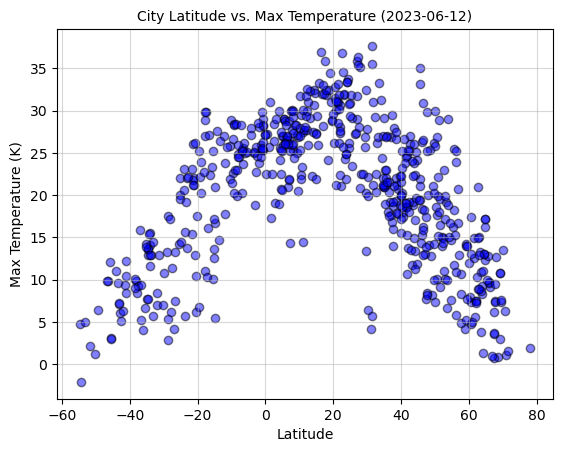

In [19]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(latitude, temperature, marker='o', alpha=0.5, c='blue', edgecolors='black')

formatted_date = pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').iloc[0]

plt.title('City Latitude vs. Max Temperature ({})'.format(formatted_date), fontsize=10)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Max Temperature (K)', fontsize=10)
plt.grid(True, linestyle='-', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

In [20]:
#city_data_df.head()

#### Latitude Vs. Humidity

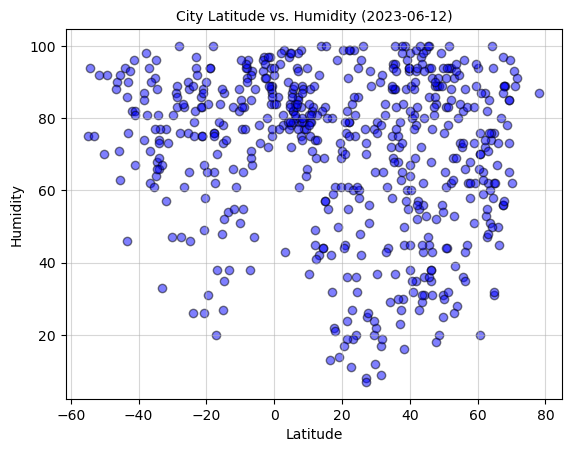

In [21]:
#Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']


# Incorporate the other graph properties
plt.scatter(latitude, humidity, marker='o', alpha=0.5, c='blue', edgecolors='black')

formatted_date = pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').iloc[0]

plt.title('City Latitude vs. Humidity ({})'.format(formatted_date), fontsize=10)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Humidity', fontsize=10)
plt.grid(True, linestyle='-', alpha=0.5)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

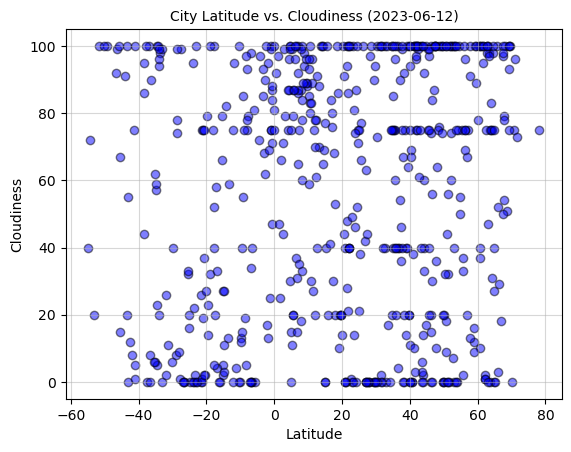

In [22]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

#Incorporate the other graph properties
plt.scatter(latitude, cloudiness, marker='o', alpha=0.5, c='blue', edgecolors='black')

formatted_date = pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').iloc[0]

plt.title('City Latitude vs. Cloudiness ({})'.format(formatted_date), fontsize=10)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Cloudiness', fontsize=10)
plt.grid(True, linestyle='-', alpha=0.5)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

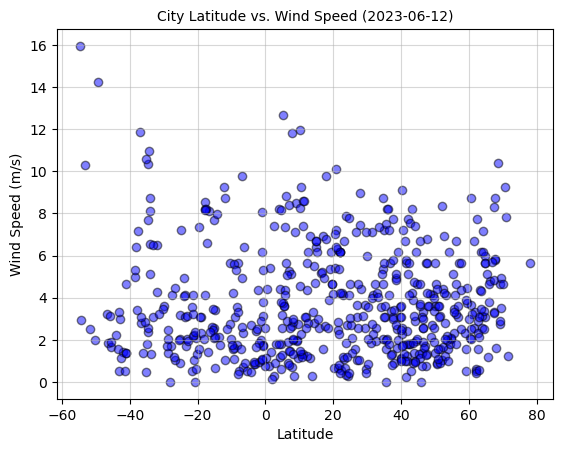

In [23]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(latitude, wind_speed, marker='o', alpha=0.5, c='blue', edgecolors='black')

formatted_date = pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').iloc[0]

plt.title('City Latitude vs. Wind Speed ({})'.format(formatted_date), fontsize=10)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Wind Speed (m/s)', fontsize=10)
plt.grid(True, linestyle='-', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
#Define a function to create Linear Regression plots

def linear_regression(filtered_data, x, y ):
        
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept

    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.plot(x, line, color='red')
    plt.xlabel('Latitude')
    print(f"The r-value is: {r_value:.2f}")
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.min(), y.max(), equation, fontsize=12, color='red')
    plt.show()
    



# Show the plot
plt.show()

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,inarajan village,13.2736,144.7484,29.11,92,70,6.94,GU,1686608680
3,ujae,8.9322,165.7642,28.34,77,94,8.50,MH,1686608680
4,belle fourche,44.6714,-103.8522,24.17,53,17,4.67,US,1686608681
5,mitu,1.1983,-70.1733,25.67,86,97,0.76,CO,1686608681
6,lai chau,22.3997,103.4517,21.08,99,100,0.58,VN,1686608681


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.99,65,16,3.17,PN,1686608680
1,edinburgh of the seven seas,-37.0676,-12.3116,15.93,94,100,11.87,SH,1686608680
7,ushuaia,-54.8000,-68.3000,4.81,75,40,15.95,AR,1686608681
13,pampierstad,-27.7832,24.6877,6.20,76,1,1.70,ZA,1686608682
18,west island,-12.1568,96.8225,26.99,83,75,9.27,CC,1686608683


In [56]:
#linear_regression(northern_hemi_df, 'Lat', 'Max Temp', 'Northern')

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.72


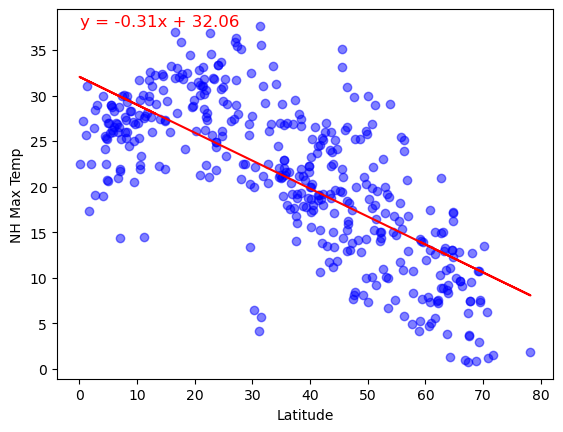

In [57]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('NH Max Temp')
linear_regression(northern_hemi_df, x, y) 


The r-value is: 0.82


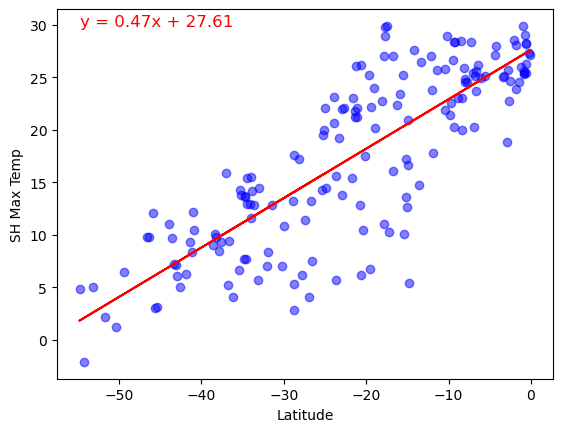

In [58]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('SH Max Temp')
linear_regression(southern_hemi_df, x, y) 


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06


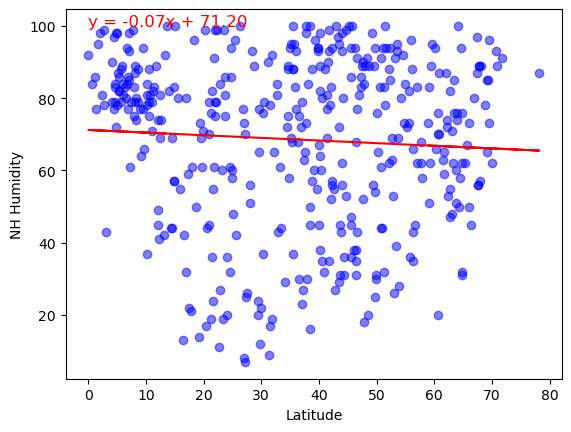

In [59]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

plt.xlabel('Latitude')
plt.ylabel('NH Humidity')
linear_regression(northern_hemi_df, x, y)



The r-value is: 0.03


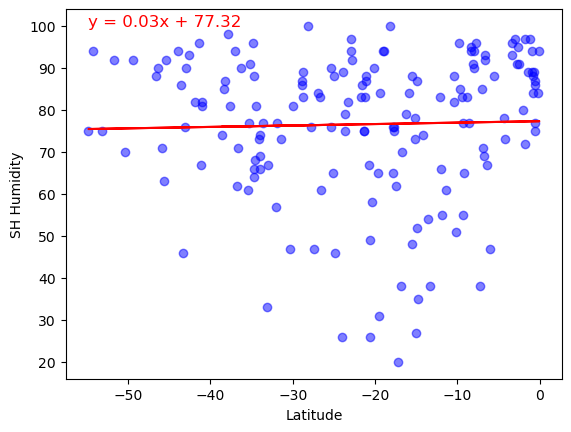

In [60]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

plt.xlabel('Latitude')
plt.ylabel('SH Humidity')
linear_regression(southern_hemi_df, x, y) 


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03


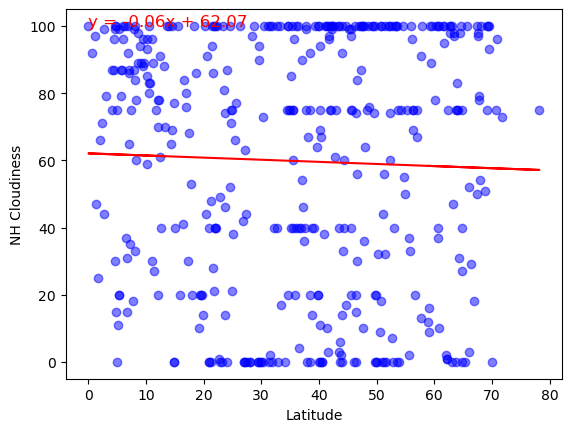

In [43]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('NH Cloudiness')
linear_regression(northern_hemi_df, x, y)


The r-value is: 0.01


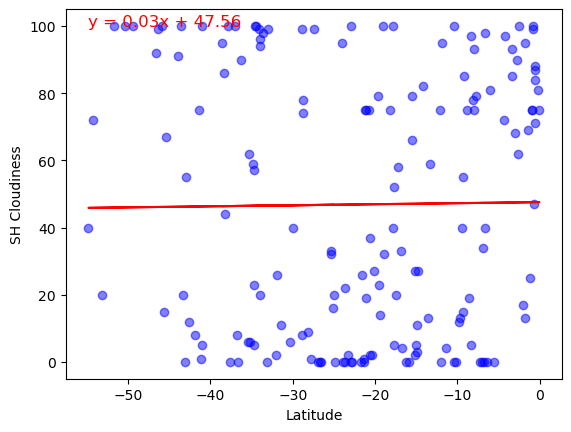

In [44]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('SH Cloudiness')
linear_regression(southern_hemi_df, x, y) 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03


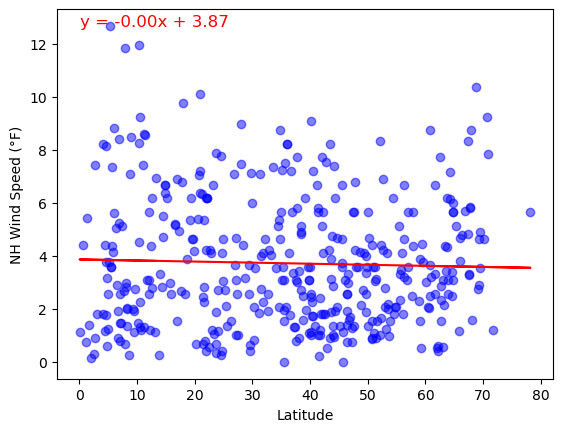

In [45]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('NH Wind Speed (°F)')

linear_regression(northern_hemi_df, x, y)


The r-value is: -0.20


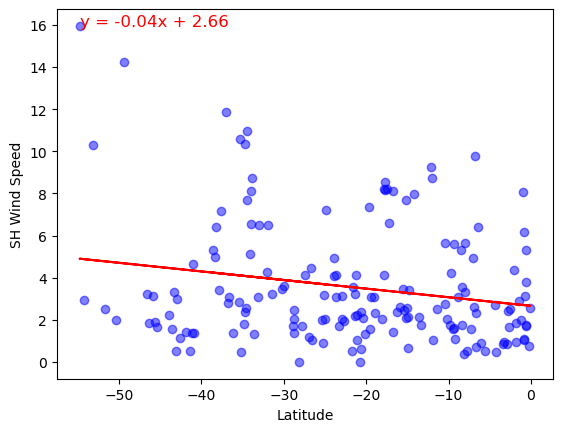

In [46]:
# Southern Hemisphere

# Extract the relevant columns for linear regression
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('SH Wind Speed')
linear_regression(southern_hemi_df, x, y) 


**Discussion about the linear relationship:** YOUR RESPONSE HERE